### 군집화 알고리즘 테스트를 위한 데이터 생성 - make_blobs

In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, load_iris
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [23]:
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape) #데이터, 타겟 

(200, 2) (200,)


In [24]:
#타겟값 분포를 확인 
unique, counts = np.unique(y, return_counts=True)  

In [25]:
print(unique, counts)

[0 1 2] [67 67 66]


In [26]:
clusterDF = pd.DataFrame(data = X, columns=['ftr1', 'ftr2']) 
clusterDF['target']=y
clusterDF

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


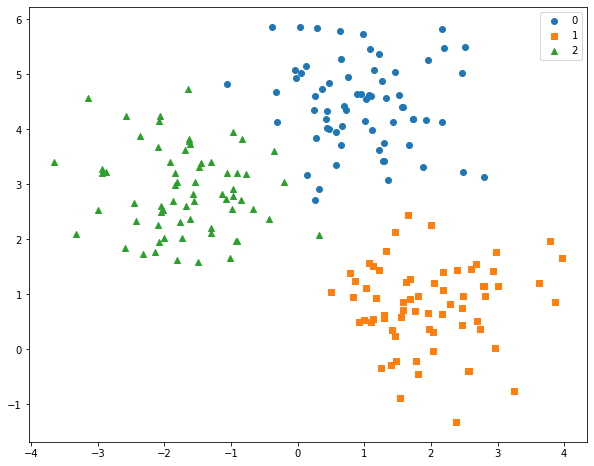

In [27]:
#타겟 시각화
plt.figure(figsize=(10,8))
markers=['o','s','^']
for target in unique.tolist():
    plt.scatter(x=clusterDF[clusterDF['target']==target]['ftr1'], y=clusterDF[clusterDF['target']==target]['ftr2'], marker=markers[target], label=target)

plt.legend() 
plt.show()

In [28]:
#클러스터링한 후 시각화
kmeans= KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
kmeans.fit(clusterDF.drop('target',axis=1))  
kmeans.labels_

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2], dtype=int32)

In [29]:
clusterDF['cluster']=kmeans.labels_
clusterDF

,ftr1,ftr2,target,cluster
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


In [30]:
kmeans.cluster_centers_ # 각 군집의 중심좌표계 

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

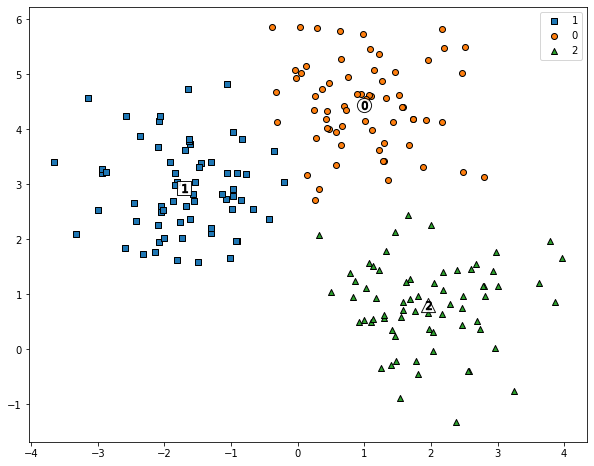

In [31]:
plt.figure(figsize=(10,8))

markers= ['o','s','^']
for cluster in clusterDF['cluster'].unique().tolist():
    plt.scatter( x=clusterDF[clusterDF['cluster']==cluster]['ftr1'], y=clusterDF[clusterDF['cluster']==cluster]['ftr2'], marker=markers[cluster], label=cluster, edgecolor='k') #black
    
    #군집 중심점 시각화 (cluster_centers)
    plt.scatter(x=kmeans.cluster_centers_[cluster][0], y=kmeans.cluster_centers_[cluster][1], s=200, marker=markers[cluster], color='white', alpha=0.9, edgecolor='k')      
    plt.scatter(x=kmeans.cluster_centers_[cluster][0], y=kmeans.cluster_centers_[cluster][1], s=70, edgecolor='k', color='k', marker='$%d$' %cluster)  
    
plt.legend()
plt.show()

In [32]:
clusterDF.groupby(['target','cluster'])['ftr2'].count() 

target  cluster
0       0          66
        1           1
1       2          67
2       1          65
        2           1
Name: ftr2, dtype: int64

#### 2개 데이터 정도 다르게 군집화됨

### 군집 평가 (Cluster Evaluation) - 실루엣 분석(silhouette analysis) 
- silhouette_score(): 0에서 1사이의 값을 가지며, 1에 가까울수록 좋다.
- 하지만 전체 실루엣 계수의 평균값(silhouette_score)과 더불어 개별 군집의 평균값(silhouette_samples)의 편차가 크지 않아야 한다. 

In [33]:
#iris 데이터 클러스터링
iris=load_iris()
irisDF= pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

In [34]:
#클러스터링이 된 후 실루엣 계수 계산
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples.shape: ',score_samples.shape)


silhouette_samples.shape:  (150,)


In [35]:
irisDF['silhouette_coeff']=score_samples #실루엣 계수 변수 추가
irisDF

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.425136
146,6.3,2.5,5.0,1.9,0,0.104171
147,6.5,3.0,5.2,2.0,2,0.314930
148,6.2,3.4,5.4,2.3,2,0.352454


In [36]:
#모든 데이터에 대해서 평균 실루엣 계수 값을 구함
average_score=silhouette_score(iris.data, irisDF['cluster'])
print('mean(silhouette_samples): ',irisDF['silhouette_coeff'].mean(),'\n', 'silhouette_score: ', average_score, sep='')

mean(silhouette_samples): 0.5528190123564094
silhouette_score: 0.5528190123564094


mean(silhouette_samples) == silhouette_score

In [37]:
#군집별 실루엣 계수 비교
irisDF.groupby('cluster')['silhouette_coeff'].mean() 

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

#### 7-1의 예제와 같이 1번 군집은 평균 계수값이 0.79로 명확하게 분리되어 있는 것을 볼 수 있다.  
#### - 평균 실루엣 계수 값은 대략 0.56
#### - 하지만, 0번 2번 군집의 실루엣 계수와 같이 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수는 없다. 
#### - 실루엣 계수는 평균값이므로 개별 군집별 평균값의 편차가 크지 않아야 한다. (=각 군집별 평균 실루엣 계수가 일정해야 좋다.)

In [39]:
irisDF.groupby('cluster')['silhouette_coeff'].std() 

cluster
0    0.174364
1    0.049954
2    0.146517
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
### - 실루엣 계수로 최적의 군집화 개수를 찾는다.

In [42]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt 
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists) 
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
         
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

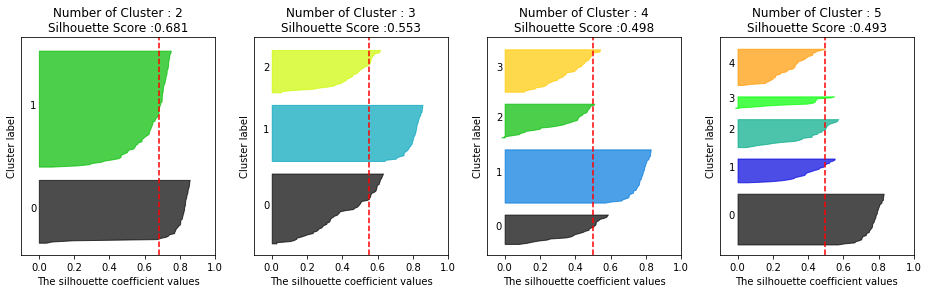

In [43]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)